<a href="https://colab.research.google.com/github/cath19/DSPS_cHarty/blob/master/HW9/higgsbosonSearch_cHarty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Catherine Harty

PHYS467

HW 9

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import os
import json 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


- Download the Higgs boson data from Kaggle (programmatically within the notebook)
see how I did it in the Titanic Trees notebook https://github.com/fedhere/DSPS/blob/master/lab9/titanictree.ipynb

find the correct API link here https://www.kaggle.com/c/higgs-boson/data



- Read in the trainind data. Split the provided training data into a training and a test set. 
The last 2 columns are what you want to predict: "weight" and "label".
Remove them from the input data and create a separate variable label and a separate variable weight, which will be your target variables for, respectively, classification and regression.



In [3]:
pip install kaggle

In [3]:
cd ..

/


In [4]:
cd root

/root


In [0]:
mkdir .kaggle

In [7]:
cd .kaggle

/root/.kaggle


In [0]:
!cp /content/gdrive/My\ Drive/kaggle.json ./

In [0]:
!chmod 600 kaggle.json

In [0]:
envs = json.load(open("kaggle.json", "r"))
os.environ["catherineharty"] = envs['username']
os.environ["824253b26696e60f3f970caa98c670cf"] = envs['key']


In [11]:
!kaggle datasets list

ref                                                      title                                               size  lastUpdated          downloadCount  
-------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
tristan581/17k-apple-app-store-strategy-games            17K Mobile Strategy Games                            8MB  2019-08-26 08:22:16          10974  
rajeevw/ufcdata                                          UFC-Fight historical data from 1993 to 2019          3MB  2019-07-05 09:58:02           6415  
gustavomodelli/forest-fires-in-brazil                    Forest Fires in Brazil                              31KB  2019-08-24 16:09:16          12070  
akhilv11/border-crossing-entry-data                      Border Crossing Entry Data                           4MB  2019-08-21 14:51:34           5215  
shuyangli94/food-com-recipes-and-user-interactions       Food.com Recipes and Interactio

In [12]:
ls

kaggle.json


In [13]:
cd ..

/root


In [14]:
cd ..

/


In [15]:
cd content/gdrive/My\ Drive/dsps

/content/gdrive/My Drive/dsps


In [16]:
mkdir higgsboson

mkdir: cannot create directory ‘higgsboson’: File exists


In [17]:
cd higgsboson

/content/gdrive/My Drive/dsps/higgsboson


In [18]:
!kaggle competitions download -c higgs-boson

random_submission.zip: Skipping, found more recently modified local copy (use --force to force download)
training.zip: Skipping, found more recently modified local copy (use --force to force download)
test.zip: Skipping, found more recently modified local copy (use --force to force download)
HiggsBosonCompetition_AMSMetric_rev1.py: Skipping, found more recently modified local copy (use --force to force download)


In [19]:
!unzip training.zip

Archive:  training.zip
replace training.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [0]:
higgsdata = pd.read_csv('training.csv')

In [21]:
higgsdata.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [0]:
weights = higgsdata['Weight'].values
labels = higgsdata['Label'].values
higgsdata.drop(columns = ['Weight', 'Label'], inplace = True)

In [23]:
higgsdata.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,158.432217,1.437609,-0.128305,-708.985189,38.707419,-0.010973,-0.008171,46.660207,-0.019507,0.043543,41.717235,-0.010119,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,115.706115,0.844743,1.193585,453.596721,22.412081,1.214079,1.816763,22.064922,1.264982,1.816611,32.894693,1.812223,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,46.104000,0.047000,-1.414000,-999.000000,20.000000,-2.499000,-3.142000,26.000000,-2.505000,-3.142000,0.109000,-3.142000,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,77.550000,0.883000,-1.371000,-999.000000,24.591750,-0.925000,-1.575000,32.375000,-1.014000,-1.522000,21.398000,-1.575000,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,120.664500,1.280000,-0.356000,-999.000000,31.804000,-0.023000,-0.033000,40.516000,-0.045000,0.086000,34.802000,-0.024000,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,200.478250,1.777000,1.225000,0.000000,45.017000,0.898000,1.565000,53.390000,0.959000,1.618000,51.895000,1.561000,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,19.773000,1.414000,1.000000,764.408000,2.497000,3.142000,560.271000,2.503000,3.142000,2842.617000,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000


In [24]:
labels

array(['s', 'b', 'b', ..., 's', 'b', 'b'], dtype=object)

In [25]:
weights

array([0.00265331, 2.23358449, 2.34738894, ..., 0.01863612, 1.68161144,
       1.87747381])

In [0]:
# leave
from sklearn.model_selection import train_test_split 

- Use a Random Forest and a Gradiend Boosted Tree Classifier model to predict the label of the particles. get the score of the model on the training and test set and comment on the result for each model.


In [27]:
#leave 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification

# Look at parameters used by our current forest
rf = RandomForestClassifier(random_state = 0)
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 'warn', 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [0]:
gbt = GradientBoostingClassifier(random_state = 0)

In [30]:
higgsdata.reset_index(drop = True, inplace = True)
trainData, testData = train_test_split(higgsdata, train_size = 0.75, random_state = 0)
rf.fit(trainData, labels[trainData.index]);
gbt.fit(trainData, labels[trainData.index]);

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


calculate the  scores for the training and test sets and evaluate  overtraining etc

In [31]:
rfScore = (rf.score(trainData, labels[trainData.index]), rf.score(testData, labels[testData.index]))
gbtScore = (gbt.score(trainData, labels[trainData.index]), gbt.score(testData, labels[testData.index]))

print('Random Forest Model Scores:\n    Training:\t%.2f%%\n    Test:\t%.2f%%' % (100*rfScore[0], 100*rfScore[1]))
print('\nGradient Boosting Model Scores:\n    Training:\t%.2f%%\n    Test:\t%.2f%%' % (100*gbtScore[0], 100*gbtScore[1]))


Random Forest Model Scores:
    Training:	98.79%
    Test:	82.34%

Gradient Boosting Model Scores:
    Training:	83.35%
    Test:	83.25%


# **Compare models**

- Produce a confusion matrix for each model and compare them


 



In [0]:
# I creaded this function (mostly copied from sklearn examples). 
# You can use it to create the confusion matrix
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title='',
                          cmap=pl.cm.bone):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """         
    if normalize:
          title = title + ' Normalized confusion matrix'
    else:
          title = title + ' Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # plot it
    fig, ax = plt.subplots(1, 1)
    fig.subplots_adjust()
    im = ax.imshow(cm, cmap=cmap)
    ax_divider = make_axes_locatable(ax)
    # add an axes to the right of the main axes.
    pl.xticks([0, 1], labels=["N", "P"])
    pl.ylim(-0.5,1.5)
    pl.yticks([0,1], labels=["N", "P"])    
    pl.title(title)
    cax = ax_divider.append_axes("right", size="10%", pad="2%")
    cb = colorbar(im, cax=cax)

def confusion_matrix_numbers(model, data):
    predictP = model.predict(data) == 's'
    actualP = labels[data.index] == 's'
    predictN = model.predict(data) == 'b'
    actualN = labels[data.index] == 'b'

    PP = sum(predictP*actualP)
    NP = sum(predictN*actualP)
    NN = sum(predictN*actualN)
    PN = sum(predictP*actualN)

    print([['NP: ' + str(NP), 'PP: ' + str(PP)],['NN: ' + str(NN), 'PN: ' + str(PN)]])
    accuracy = (PP + NN) / (PP + NN + NP + PN)
    print('The total accuracy of this model on the data is %.2f%%' % (100*accuracy))
    

[['NP: 7266', 'PP: 14118'], ['NN: 37344', 'PN: 3772']]
The total accuracy of this model on the data is 82.34%


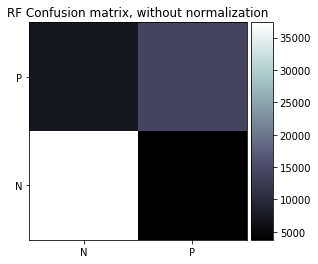

In [33]:
plot_confusion_matrix(y_true = labels[testData.index], y_pred = rf.predict(testData), title = 'RF')
confusion_matrix_numbers(rf, testData)

**Figure 1**: This is a RF Confusion matrix, without nomalization. This resulted in a total accuracy of 82.34% for the model on the data. P stands for positive, while N stands for negative. For this matrix, P corresponds to an 's' label and N corresponds to a 'b' label. The whiter the color, the more correct predictions. The darker the color, the less correct predictions.

The PP block appears as a middle-toned gray color. It corresponded to 14118 instances.

The NN block had more instances than the PP block, which contained 37344 instances. This is also why it appears white in color.

The NP and PN blocks are the darkest blocks. They had the fewest instances of 7266 and 3772 respectively.

[['NP: 6227', 'PP: 15157'], ['NN: 36874', 'PN: 4242']]
The total accuracy of this model on the data is 83.25%


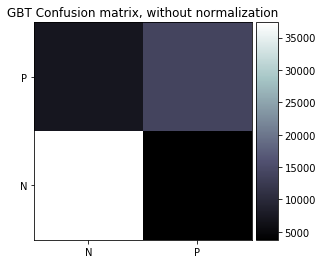

In [34]:
plot_confusion_matrix(y_true = labels[testData.index], y_pred = rf.predict(testData), title = 'GBT')
confusion_matrix_numbers(gbt, testData)

**Figure 2**: This is a GBT Confusion matrix, without nomalization. This resulted in a total accuracy of 82.25% for the model on the data. P stands for positive, while N stands for negative. For this matrix, P corresponds to an 's' label and N corresponds to a 'b' label. The whiter the color, the more correct predictions. The darker the color, the less correct predictions.

The PP block appears as a middle-toned gray color. It corresponded to 15157 instances.

The NN block had more instances than the PP block, which contained 36874 instances. This is also why it appears white in color.

The NP and PN blocks are the darkest blocks. They had the fewest instances of 6227 and 4242 respectively.

**Comment**: The two confusion matrices were fairly similar in their accuracies. For the PP block, the GBT confusion matrix resulted in a higher instance number and therefore more correct predictions than the RF confusion matrix. For the NN block, the NF confusion matric resulted in more correct predictions than the GBT confusion matrix. The NP block had more correct predictions in the RF confusion matrix, and the PN block had more correct predictions in the GBT matrix.

Overall, the RF confusion matrix ended up having a higher accuracy of 82.34%.


- Use a Random Forest and a Gradiend Boosted Tree Regressor model to predict the weight of the particles. Compare the model performance on training and test setsm


In [0]:
trainWeights, testWeights = weights[trainData.index], weights[testData.index]

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

rfR = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=0)
rfR.fit(trainData, trainWeights)
gbtR = GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=0)
gbtR.fit(trainData, trainWeights)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

 Calculate the L2 and L1 loss functions for the fitted regression models (see slides for the definition) and discuss the results

In [37]:
L1 = sum(abs(testWeights - rfR.predict(testData)))
L2 = sum((testWeights - rfR.predict(testData))**2)
print('Random Forest Method: \nL1: \t%d \nL2: \t%d' % (L1, L2))

L1 = sum(abs(testWeights - gbtR.predict(testData)))
L2 = sum((testWeights - gbtR.predict(testData))**2)
print('\nGradient Boosting Method: \nL1: \t%d \nL2: \t%d' % (L1, L2))

Random Forest Method: 
L1: 	62814 
L2: 	114399

Gradient Boosting Method: 
L1: 	52788 
L2: 	85175


<span style="color:red">**-5 pts: missing comparison**</span>

- For the Random Forest classifier, find the 4 most important features based on the simple unoptimized model you created earlier on. Use the documentation to find out what they are. We have not talked abotu the physics of this problem at all but the Kaggle challenge description should provide enogh information for you to comment on this result is somewhat superficially.

You can use ```rf.feature_importance_``` on the trained model to extract the relative importance of each feature (a number from 0 to 1) and then choose the features that have the 4 highest numbers (the numpy function ```argsort()``` is helpful here!)

Explore the parameter space with the sklearn module ```sklearn.model_selection.RandomizedSearchCV``` *fitting only those 4 features*

Follow this example to set up the parameter search. Set the estimators to 10 and 100, (the number of trees) and the max depth to 3, and 10, and None (let it be unconstrained). Set bootstrap to both True and False. Set the number of features to consider at every split to both "autp" and "sqrt". Use ```pprint``` like I did earlier in this notebook to print the parameters set

**this takes some computational time! so do not start this at the last minute!!**

 



In [38]:
importances = [(i, j) for i, j in zip(trainData.columns, rf.feature_importances_)]
importances.sort(key = lambda x: x[1], reverse = True)
for i in range(4):
  print("%30.30s:\t %.2f" % importances[i])
bestFeatures = [importances[i][0] for i in range(4)]

                  DER_mass_MMC:	 0.16
   DER_mass_transverse_met_lep:	 0.11
                  DER_mass_vis:	 0.07
                    PRI_tau_pt:	 0.06


In [0]:
random_grid = {'max_depth': [3, 10, None], 'max_features': ['auto', 'sqrt'], 'n_estimators': [10, 100]}

 mine and your best features do not necessarily have to be the same because our models may be different (different parameters, different random seed etc)

In [42]:
higgsdata[bestFeatures]

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,PRI_tau_pt
0,138.470,51.655,97.827,32.638
1,160.937,68.768,103.235,42.014
2,-999.000,162.172,125.953,32.154
3,143.905,81.417,80.943,22.647
4,175.864,16.915,134.805,28.209
...,...,...,...,...
249995,-999.000,71.989,36.548,24.754
249996,-999.000,58.179,68.083,23.416
249997,105.457,60.526,75.839,35.636
249998,94.951,19.362,68.812,27.944


In [44]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# search across 18 different combinations
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# search across 18 different combinations
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(estimator = rf, param_distributions=random_grid, n_iter=1, cv=3, iid=False)
random_search.fit(higgsdata[bestFeatures], labels);

scores = random_search.cv_results_['split0_test_score'][0], random_search.cv_results_['split1_test_score'][0], random_search.cv_results_['split2_test_score'][0]
print("Tuned RF  Parameters: %s, %s, %s, %s" % (bestFeatures[0], bestFeatures[1], bestFeatures[2], bestFeatures[3]))
print("Best score is %.4f" % max(scores))

Tuned RF  Parameters: DER_mass_MMC, DER_mass_transverse_met_lep, DER_mass_vis, PRI_tau_pt
Best score is 0.8175


<span style="color:red">**-2.5 pts: Tuned RF parameters is not the most important columns, it is the best parameters for RF model which means best max_depth, max_feature, etc.**</span>

<span style="color:red">**-2.5 pts: should use best_score_ attribute of RSCV to get best score.**</span>

Note that this may take a long time! It took 1 hour for me to run this. Dont start at the last minute!!

In [45]:
df = pd.DataFrame(random_search.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,34.41771,0.036326,1.199211,0.003745,100,auto,10,"{'n_estimators': 100, 'max_features': 'auto', ...",0.814577,0.814301,0.817453,0.815444,0.001425,1


# Plot a simple 3-point ROC curve for the model with the best parameters found in the previous step. Describe it. 

In [0]:
rf.fit(trainData, labels[trainData.index].flatten()=="s");

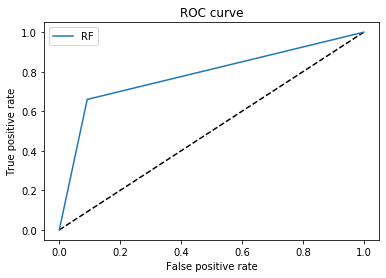

In [50]:
# The random forest model by itself
from sklearn.metrics import roc_curve
y_pred_grd_rfcat = rf.predict_proba(testData)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(labels[testData.index].flatten()=="s", rf.predict(testData))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

**Figure 3**: A graph showing the relationship between the true positive rate and the false postive rate. The blue line depicts the model and the dashed line depicts the prediciton. The model first increases and then flattens out.
